# Predict Car Prices

Predict a car's market price using its attributes. The data set contains information on various cars: about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. Read more about the data set here ([link](https://archive.ics.uci.edu/ml/datasets/automobile)) and can download it directly from here ([link](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)).

## Introduce The Data Set

In [17]:
import pandas as pd
import numpy as np

# read into a dataframe:
cars = pd.read_csv('imports-85.data')

print('size of dadaset: ',cars.shape)
cars.head()

size of dadaset:  (204, 26)


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


There is no columns names in dataset. It may be because this dataset is made for machine learning algorithms and data should be without columns name. Can get list of columns from documentation and add it to the dataset.

In [20]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
           'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
           'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
           'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Can't predict price with non-numeric data. Choose from all columns only columns with continous data:

* **normalized-losses:** continuous from 65 to 256. 
* **wheel-base: continuous:** from 86.6 120.9. 
* **length:** continuous from 141.1 to 208.1. 
* **width:** continuous from 60.3 to 72.3. 
* **height:** continuous from 47.8 to 59.8. 
* **curb-weight:** continuous from 1488 to 4066. 
* **bore:** continuous from 2.54 to 3.94. 
* **stroke:** continuous from 2.07 to 4.17. 
* **compression-ratio:** continuous from 7 to 23. 
* **horsepower:** continuous from 48 to 288. 
* **peak-rpm:** continuous from 4150 to 6600. 
* **city-mpg:** continuous from 13 to 49. 
* **highway-mpg:** continuous from 16 to 54. 
* **price:** continuous from 5118 to 45400.

In [21]:
continous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                  'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                  'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
n_cars = cars[continous_cols].copy()
n_cars.head(20)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


## Data Cleaning

Can't have any missing values for predictive modeling. Based on the data set preview the `normalized-losses` column contains missing values represented using "?". Replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [25]:
n_cars.replace('?', np.nan, inplace=True)
n_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Because "?" is a string value, columns containing this value were cast to object data type (instead of a numeric type like int or float). After replacing the "?" values, determine which columns need to be converted to numeric types.

In [30]:
n_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [32]:
n_cars[['normalized-losses', 'bore', 'stroke', 
        'horsepower', 'peak-rpm', 'price']] = n_cars[['normalized-losses', 'bore', 
                                                      'stroke', 'horsepower', 'peak-rpm', 'price']].astype('float')
n_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [33]:
# columns with missiong values:
n_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Thare are missing values in 6 columns. Should drop `price` column missing values, because this values want to predict. All other missing values can be replaced with mean values.

In [35]:
# drop price missing values:
n_cars.dropna(subset=['price'], inplace=True)
n_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [36]:
# raplace any missing value with mean:
n_cars.fillna(n_cars.mean(), inplace=True)
n_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [37]:
# normalize the numeric ones so all values range from 0 to 1 (except price column):
prices_temp = n_cars['price']
norm_cars=(n_cars-n_cars.min())/(n_cars.max()-n_cars.min())
norm_cars['price'] = prices_temp
norm_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps structure code workflow and understand the features better.

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## function, that encapsulates the training and simple validation process:
def knn_train_test(train_col_name, target_col_name, df):
    # shuffle data:
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_data = df.reindex(shuffled_index)
    
    length = rand_data.shape[0]
    train_set_size = round(length*.5)
    
    # split data for train and test sets:
    train = rand_data[:train_set_size].copy()
    test = rand_data[train_set_size:].copy()
    
    # instantiate the KNeighborsRegressor
    model = KNeighborsRegressor()
    # fit the model
    model.fit(train[[train_col_name]], train[target_col_name])
    # predict prices on test set
    predictions = model.predict(test[[train_col_name]])
    
    # calculate the RMSE
    mse = mean_squared_error(test[target_col_name], predictions)
    rmse = mse**(1/2)
    return rmse

## train for each column in data set:

rmses = {}
# get list of all columns except price:
train_cols = norm_cars.columns.drop('price')

for col in train_cols:
    rmse = knn_train_test(col, 'price', norm_cars)
    rmses[col] = rmse

# create Series from dictionary to view results in sorted way
rmse_results = pd.Series(rmses)
rmse_results.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Modify the `knn_train_test()` function to change a parameter for the k value (1, 3, 5, 7, and 9).

In [54]:
def knn_train_test(train_col_name, target_col_name, df):
    # shuffle data:
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_data = df.reindex(shuffled_index)
    
    length = rand_data.shape[0]
    train_set_size = round(length*.5)
    
    # split data for train and test sets:
    train = rand_data[:train_set_size].copy()
    test = rand_data[train_set_size:].copy()
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        
        # instantiate the KNeighborsRegressor
        model = KNeighborsRegressor(n_neighbors=k)
        # fit the model
        model.fit(train[[train_col_name]], train[target_col_name])
        # predict prices on test set
        predictions = model.predict(test[[train_col_name]])

        # calculate the RMSE
        mse = mean_squared_error(test[target_col_name], predictions)
        rmse = mse**(1/2)
        k_rmses[k] = rmse
    
    return k_rmses

## train for each column in data set:

rmses_with_k = {}
# get list of all columns except price:
train_cols = norm_cars.columns.drop('price')

for col in train_cols:
    rmse = knn_train_test(col, 'price', norm_cars)
    rmses_with_k[col] = rmse

rmses_with_k

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

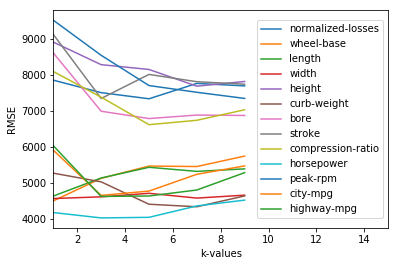

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize results:
for key, value in rmses_with_k.items():
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x,y, label=key)
    
plt.legend(loc='right')
plt.xlabel('k-values')
plt.ylabel('RMSE')
plt.xlim(1,15)
plt.show()

## Multivariate Model

Let's modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

In [86]:
def knn_train_test(train_cols, target_col_name, df):
    # shuffle data:
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_data = df.reindex(shuffled_index)
    
    length = rand_data.shape[0]
    train_set_size = round(length*.5)
    
    # split data for train and test sets:
    train = rand_data[:train_set_size].copy()
    test = rand_data[train_set_size:].copy()
    
    # set defualt value for k parameter
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        
        # instantiate the KNeighborsRegressor
        model = KNeighborsRegressor(n_neighbors=k)
        # fit the model
        model.fit(train[train_cols], train[target_col_name])
        # predict prices on test set
        predictions = model.predict(test[train_cols])

        # calculate the RMSE
        mse = mean_squared_error(test[target_col_name], predictions)
        rmse = mse**(1/2)
        k_rmses[k] = rmse
    
    return k_rmses

In [84]:
# sort list of features by mean rmse to find best features:
rmses_mean = {}
for k, rmse in rmses_with_k.items():
    mean = np.mean(list(rmse.values()))
    rmses_mean[k] = mean
    
rmse_mean_result = pd.Series(rmses_mean)
rmse_mean_result.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [89]:
rmse_results = {}

# the best 2 features:
two_best_features = ['horsepower', 'width']
rmse = knn_train_test(two_best_features, 'price', norm_cars)
rmse_results['two best features'] = rmse

# the best 3 features:
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test(three_best_features, 'price', norm_cars)
rmse_results['three best features'] = rmse

# the best 4 features:
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse = knn_train_test(four_best_features, 'price', norm_cars)
rmse_results['four best features'] = rmse

# the best 5 features:
five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse = knn_train_test(five_best_features, 'price', norm_cars)
rmse_results['five best features'] = rmse

rmse_results

{'two best features': {5: 3589.3132622073304},
 'three best features': {5: 3305.9401397969677},
 'four best features': {5: 3358.6915801682458},
 'five best features': {5: 3665.546673045813}}

## Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step. For the top 3 models, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [97]:
def knn_train_test(train_cols, target_col_name, df):
    # shuffle data:
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_data = df.reindex(shuffled_index)
    
    length = rand_data.shape[0]
    train_set_size = round(length*.5)
    
    # split data for train and test sets:
    train = rand_data[:train_set_size].copy()
    test = rand_data[train_set_size:].copy()
    
    # set defualt value for k parameter
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        
        # instantiate the KNeighborsRegressor
        model = KNeighborsRegressor(n_neighbors=k)
        # fit the model
        model.fit(train[train_cols], train[target_col_name])
        # predict prices on test set
        predictions = model.predict(test[train_cols])

        # calculate the RMSE
        mse = mean_squared_error(test[target_col_name], predictions)
        rmse = mse**(1/2)
        k_rmses[k] = rmse
    
    return k_rmses

rmse_k_results = {}

# the best 3 features:
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test(three_best_features, 'price', norm_cars)
rmse_k_results['three best features'] = rmse

# the best 4 features:
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse = knn_train_test(four_best_features, 'price', norm_cars)
rmse_k_results['four best features'] = rmse

# the best 5 features:
five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse = knn_train_test(five_best_features, 'price', norm_cars)
rmse_k_results['five best features'] = rmse

rmse_k_results

{'three best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 'four best features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.9

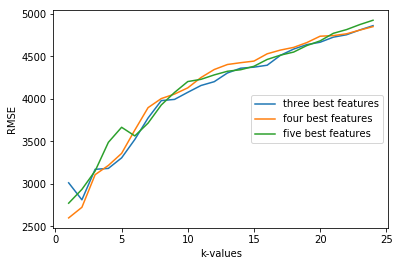

In [100]:
# visualize results:
for key, value in rmse_k_results.items():
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x,y, label=key)
    
plt.legend(loc='right')
plt.xlabel('k-values')
plt.ylabel('RMSE')
plt.show()

##  k-fold cross validation

Modify the `knn_train_test()` function to use k-fold cross validation instead of test/train validation.

In [109]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score

def knn_train_test(train_cols, target_col_name, df):
    
    k_folds = [i for i in range(2, 8)]
    f_rmses = {}
    
    for f in k_folds:
        # instantiate the KFold class
        kf = KFold(f, shuffle=True, random_state=1)
    
        # instantiate the KNeighborsRegressor
        model = KNeighborsRegressor()
    
        mses = cross_val_score(model, df[train_cols], df[target_col_name], scoring="neg_mean_squared_error", cv=kf)
        
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        f_rmses[f] = avg_rmse
    
    return f_rmses

rmse_f_results = {}

# the best 3 features:
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test(three_best_features, 'price', norm_cars)
rmse_f_results['three best features'] = rmse

# the best 4 features:
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse = knn_train_test(four_best_features, 'price', norm_cars)
rmse_f_results['four best features'] = rmse

# the best 5 features:
five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse = knn_train_test(five_best_features, 'price', norm_cars)
rmse_f_results['five best features'] = rmse

rmse_f_results

{'three best features': {2: 3189.611201564441,
  3: 3047.596573356978,
  4: 3010.5643781075432,
  5: 3027.7487021204315,
  6: 2985.6956827829617,
  7: 3044.5321764510186},
 'four best features': {2: 3278.4029729931435,
  3: 3018.1763280818377,
  4: 2962.36089700324,
  5: 2920.6998763538077,
  6: 2832.9429501597774,
  7: 2936.8539605376177},
 'five best features': {2: 3604.076820532408,
  3: 3561.7139705298064,
  4: 3401.9240797419084,
  5: 3378.3699698611117,
  6: 3293.150002140505,
  7: 3349.7349940630115}}

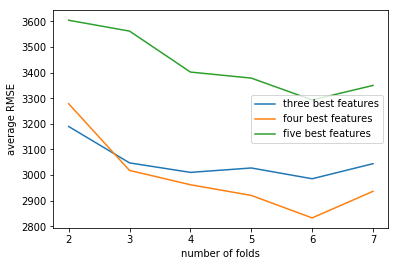

In [110]:
# visualize results:
for key, value in rmse_f_results.items():
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x,y, label=key)
    
plt.legend(loc='right')
plt.xlabel('number of folds')
plt.ylabel('average RMSE')
plt.show()

Best choise for number of folds is 6. Best features to use: `'horsepower'`, `'width'`, `'curb-weight'`, `'highway-mpg'`